In [120]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [121]:
# Importing self-made libaries

import reload_lib as rl
import sensitivity as st
import life_cycle_assessment as lc
import lcia_results as lr
import non_bio_co2 as nbc
import standards as s
import import_ecoinvent_and_databases as ied
import results_figures as rfig
import sensitivity_case1 as sc1
import sensitivity_case2 as sc2


lib = [lc, lr, nbc, s, ied, rfig, st, sc1, sc2]
rl.reload_lib(lib)

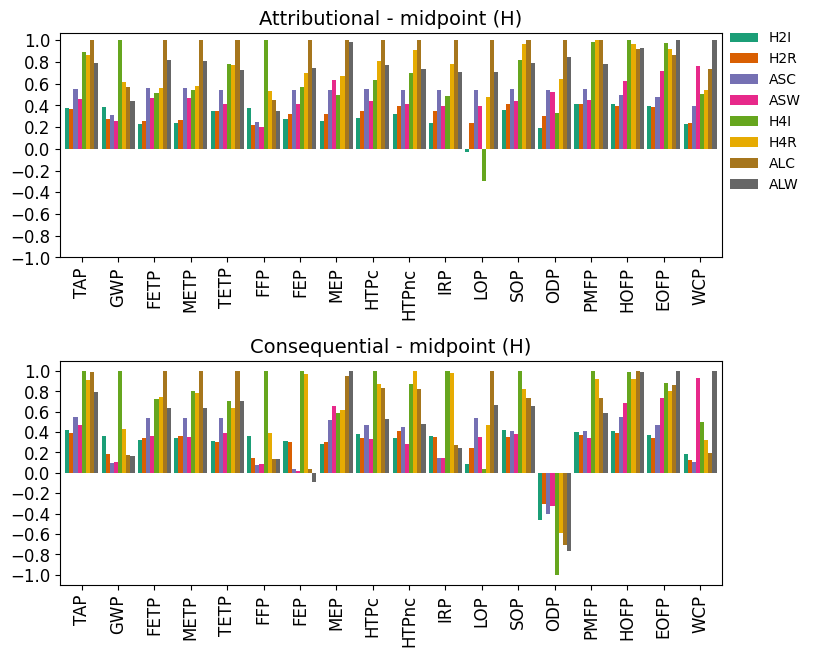

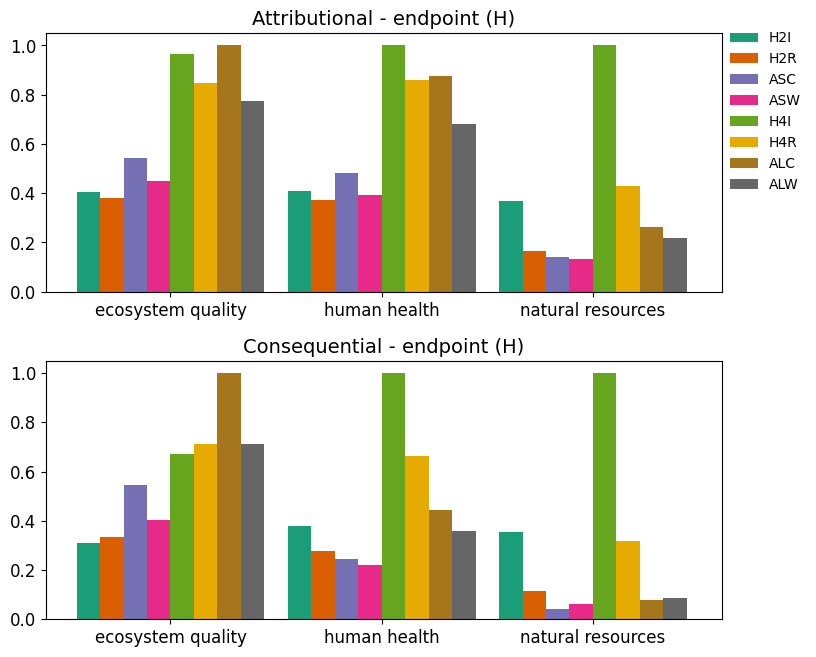

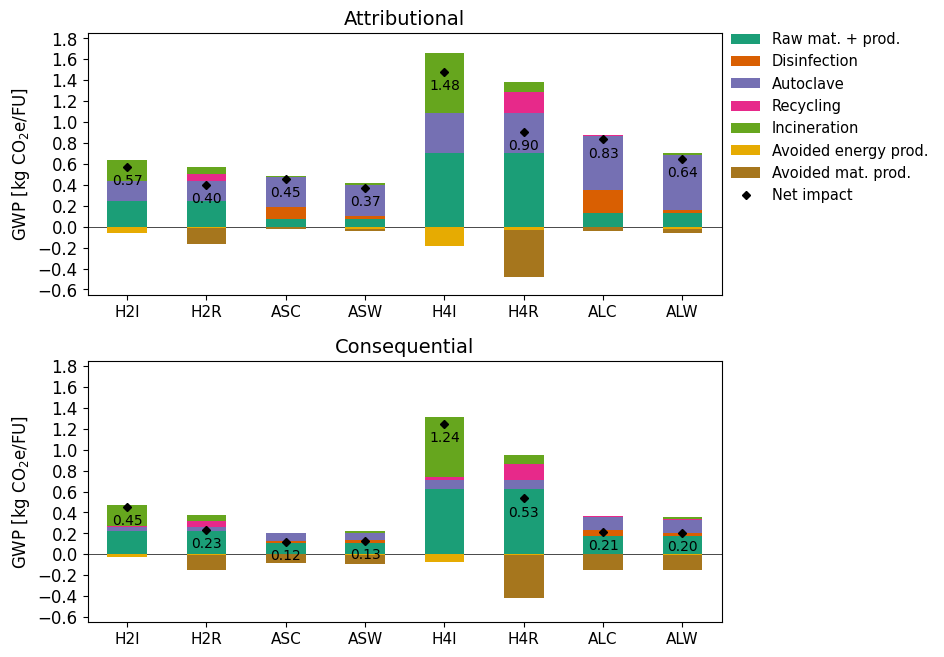

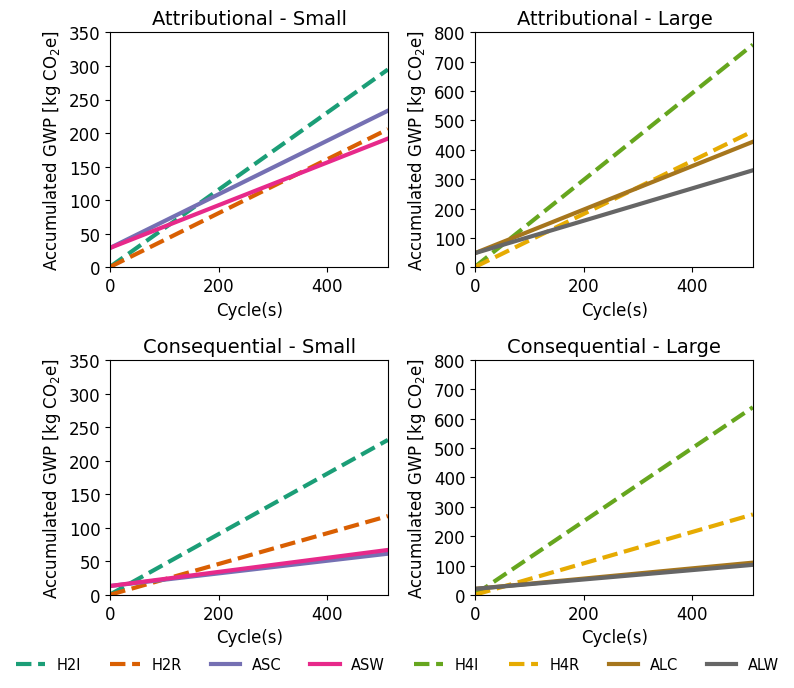

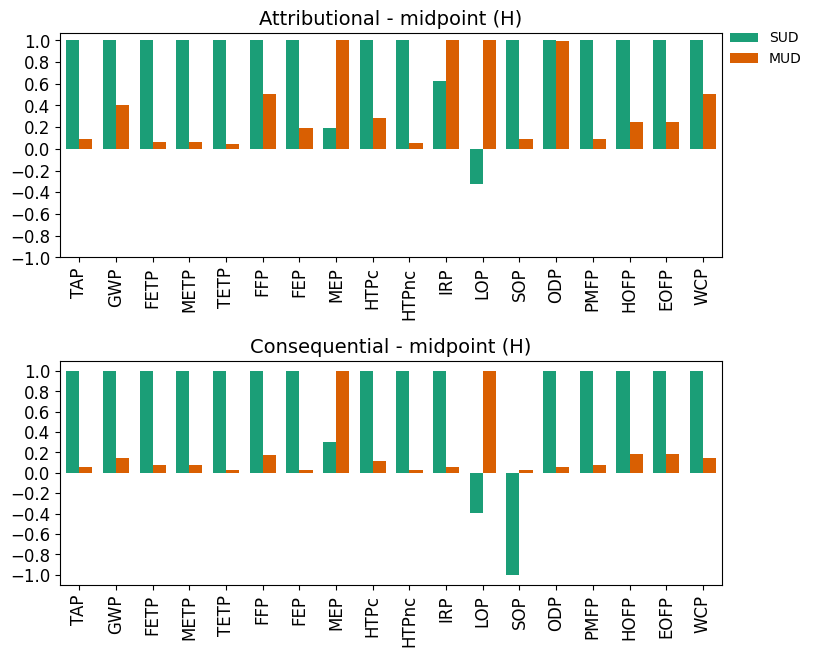

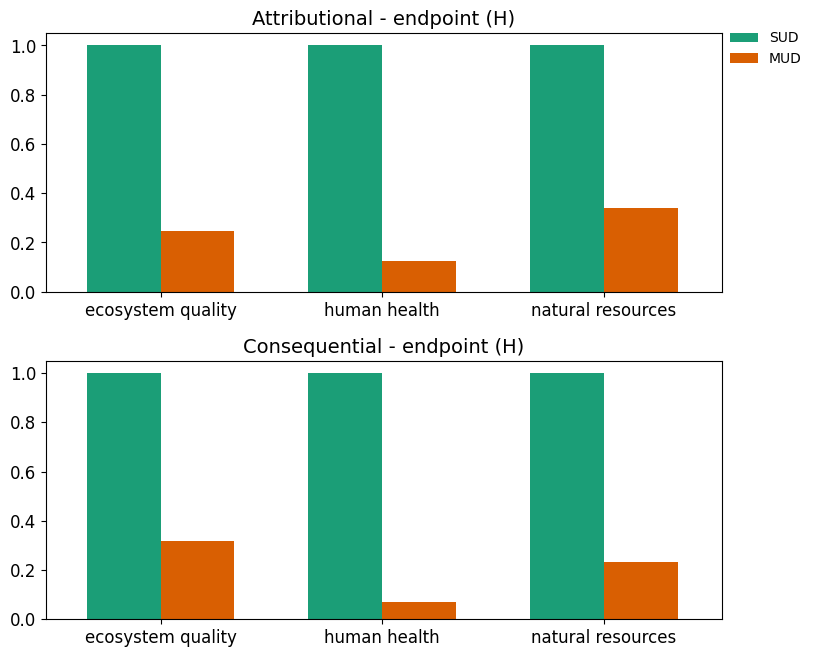

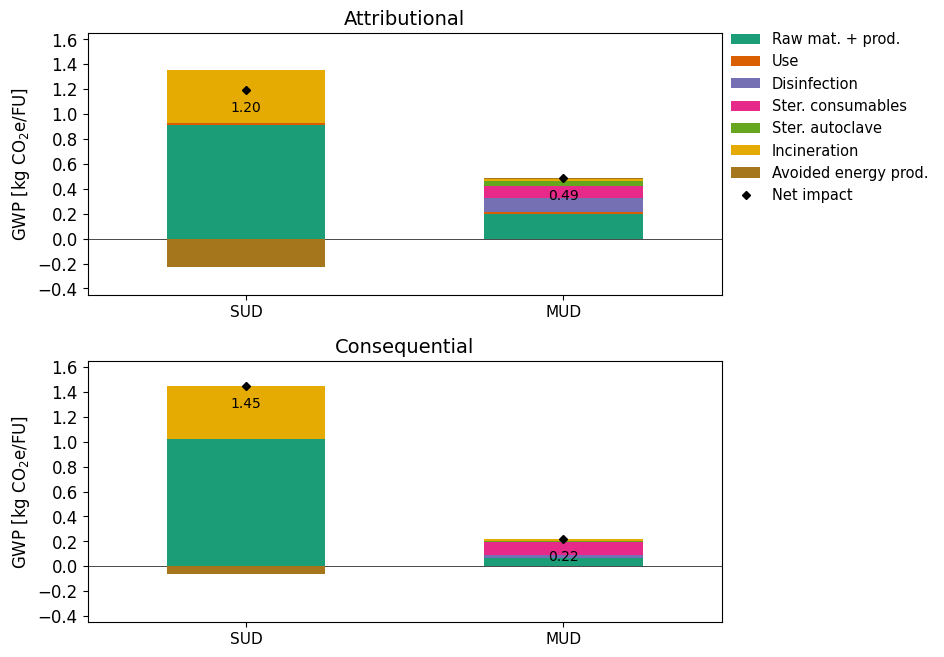

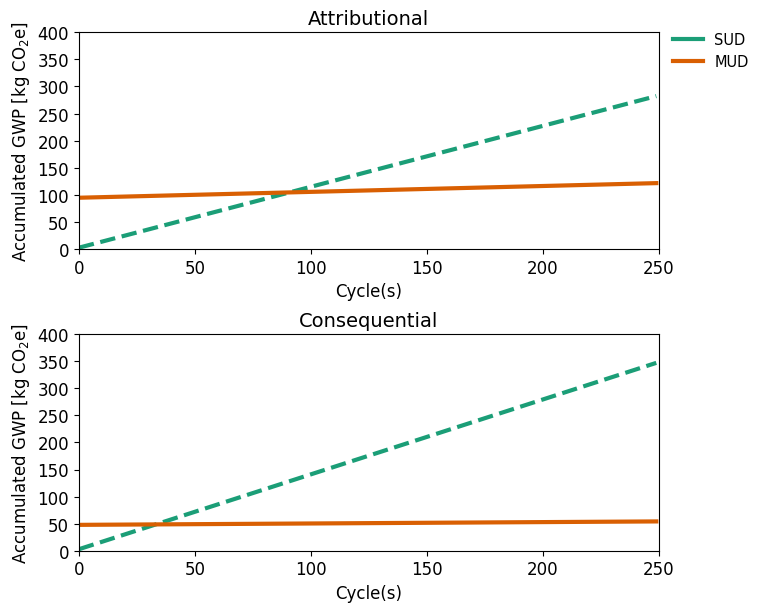

In [ ]:
rl.reload_lib(lib)
path = r'C:/Users/ruw/Desktop'
path_github, ecoinevnt_paths, system_path = s.paths(path)
case = ['case1', 'case2']
data = {}
for c in case:
    # data[c] = rfig.create_results_figures(c, path_github, ecoinevnt_paths, system_path, redo=False, reload=False) # Calculating the results and creating the figures
    data[c] = st.iterative_save_sensitivity_results_to_excel(path_github, c) # Performing the sensitivity analysis
